# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

## Get our prepped data and take a quick look at it

In [42]:
import pandas as pd

df = pd.read_csv('prepped_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tc_to_tenure_ratio,mc_to_tenure_ratio
customerID,,,,,,,,,
7590-VHVEG,1,0,2,0,29.85,29.85,0,29.850000,29.850000
5575-GNVDE,34,1,0,1,56.95,1889.50,0,55.573529,1.675000
3668-QPYBK,2,1,2,1,53.85,108.15,1,54.075000,26.925000
7795-CFOCW,45,0,0,2,42.30,1840.75,0,40.905556,0.940000
9237-HQITU,2,1,2,0,70.70,151.65,1,75.825000,35.350000
...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,0,1,84.80,1990.50,0,82.937500,3.533333
2234-XADUH,72,1,0,3,103.20,7362.90,0,102.262500,1.433333
4801-JZAZL,11,0,2,0,29.60,346.45,0,31.495455,2.690909


## Now lets use AutoML with Pycaret and run it to find the best model

In [43]:
from pycaret.classification import ClassificationExperiment

In [44]:
automl = ClassificationExperiment()

In [45]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,3758
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 9)"
4,Transformed data shape,"(7032, 9)"
5,Transformed train set shape,"(4922, 9)"
6,Transformed test set shape,"(2110, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [46]:
automl

In [48]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7974,0.8406,0.4870,0.6631,0.5608,0.4332,0.4424,0.1610
lr,Logistic Regression,0.7954,0.8296,0.4817,0.6572,0.5554,0.4268,0.4357,0.0450
lda,Linear Discriminant Analysis,0.7954,0.8258,0.4556,0.6688,0.5413,0.4159,0.4289,0.0120
ada,Ada Boost Classifier,0.7944,0.8372,0.4863,0.6524,0.5565,0.4265,0.4347,0.0610
ridge,Ridge Classifier,0.7930,0.0000,0.3983,0.6913,0.5048,0.3859,0.4096,0.0090
lightgbm,Light Gradient Boosting Machine,0.7887,0.8295,0.5023,0.6294,0.5581,0.4217,0.4266,0.4670
rf,Random Forest Classifier,0.7812,0.8096,0.4915,0.6110,0.5437,0.4022,0.4070,0.1350
nb,Naive Bayes,0.7802,0.8022,0.5703,0.5896,0.5795,0.4308,0.4311,0.0100
qda,Quadratic Discriminant Analysis,0.7704,0.8139,0.6300,0.5612,0.5929,0.4340,0.4359,0.0090
et,Extra Trees Classifier,0.7684,0.7884,0.4969,0.5750,0.5325,0.3798,0.3819,0.1110


In [49]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3758, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Looks like Gradient Boosting Classifier is the best scoring one

In [50]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Let's also create a plot and a confusion matrix

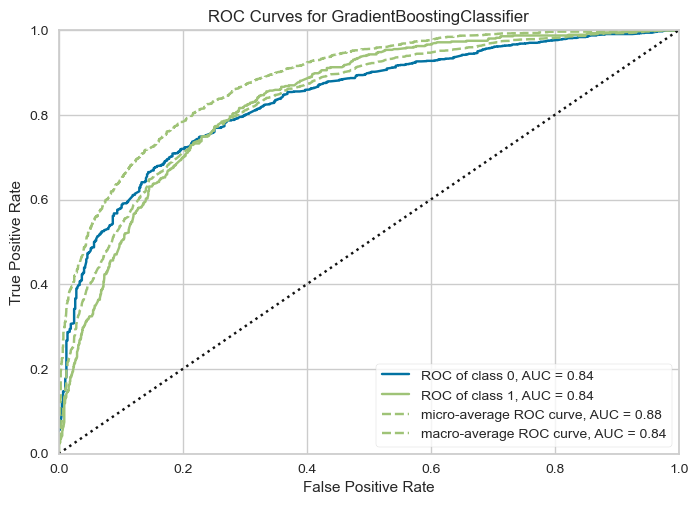

In [51]:
automl.plot_model(best_model)

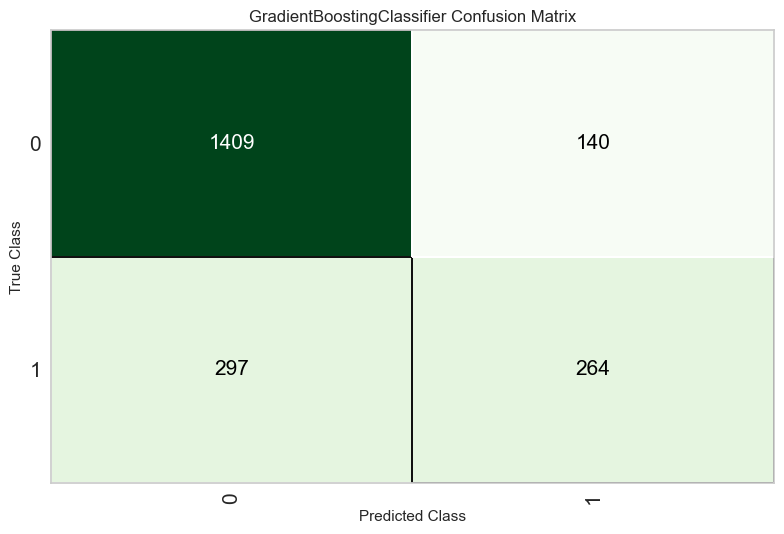

In [52]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [53]:
df.iloc[-2:-1].shape

(1, 9)

In [54]:
df.iloc[-2].shape

(9,)

## Now we can also look at some examples of predictions

In [55]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tc_to_tenure_ratio,mc_to_tenure_ratio,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,,
8361-LTMKD,4,1,2,1,74.400002,306.600006,76.650002,18.6,1,1,0.5838


In [56]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8139,0.8657,0.5072,0.7096,0.5916,0.4753,0.4865


In [57]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tc_to_tenure_ratio,mc_to_tenure_ratio,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,,
7590-VHVEG,1,0,2,0,29.850000,29.850000,29.850000,29.850000,0,1,0.7601
5575-GNVDE,34,1,0,1,56.950001,1889.500000,55.573528,1.675000,0,0,0.9356
3668-QPYBK,2,1,2,1,53.849998,108.150002,54.075001,26.924999,1,0,0.6271
7795-CFOCW,45,0,0,2,42.299999,1840.750000,40.905556,0.940000,0,0,0.9434
9237-HQITU,2,1,2,0,70.699997,151.649994,75.824997,35.349998,1,1,0.6412


## Now we save and load our model

In [58]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'tc_to_tenure_ratio',
                                              'mc_to_tenure_ratio'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,...
                                             criterion='friedman_mse', init=None,
          

In [59]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [60]:
new_data = df.iloc[-2:-1]

In [61]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tc_to_tenure_ratio,mc_to_tenure_ratio,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,,
8361-LTMKD,4,1,2,1,74.400002,306.600006,76.650002,18.6,1,1,0.5838


## Let's use our predict churn code file and run it to see that it works

In [73]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv('prepped_churn_data.csv', index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    # predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    # predictions['Churn_prediction'].replace({1: 'Yes', 0: 'No'},
    #                                         inplace=True)
    return predictions #['churn_prediction']


if __name__ == "__main__":
    df = load_data('churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [74]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
7590-VHVEG       1             0         2              0       29.850000   
5575-GNVDE      34             1         0              1       56.950001   
3668-QPYBK       2             1         2              1       53.849998   
7795-CFOCW      45             0         0              2       42.299999   
9237-HQITU       2             1         2              0       70.699997   
...            ...           ...       ...            ...             ...   
6840-RESVB      24             1         0              1       84.800003   
2234-XADUH      72             1         0              3      103.199997   
4801-JZAZL      11             0         2              0       29.600000   
8361-LTMKD       4             1         2              1       74.400002   
3186-AJIE

# Summary

This week we used pycaret to find the algorithm that performed the best on our churn data. We chose the model that scored the highest () and saved it to our disk. We created a Python file for our churn data, such as we saw in FTE. I would say that was the most challenging part but I was able to find my way through the errors with the help of Google. Then we tested our new Python module and looked at the predictions. Now the only thing missing is creating a Github respository. 


